In [1]:
# Import the modified CSV file for better visualization.
# Note that the added sufixes (".1", ".2", ..., ".25") is added by pandas when read by doing df = pd.read_csv(csv_file).
# The actual CSV does not contain those sufixes.
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from IPython.display import display, HTML
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from matplotlib.colors import LinearSegmentedColormap


DATA_DIR = Path.home() / "projects" / "data"

csv_file = DATA_DIR / "processed" / "GSE290585_SeSaMeBeta_MM285_BS_simplified_columns.csv" # path to mouse csv file

print(sys.executable)
print(csv_file.exists())

df = pd.read_csv(csv_file)

with pd.option_context("display.max_columns", None,
                       "display.width", None):
        display(df.head(20))

# --- Colormap used in plots ---
blue_yellow = LinearSegmentedColormap.from_list(
    "blue_yellow",
    ["#0000FF", "#ffff00"]
    )

# count how many cell type duplicates
# cell_type_counts = df.columns[1:].str.split(".", n=1).str[0].value_counts()
# print(cell_type_counts)

# stats
X = df.drop(columns=['probe_ID'])
stats = pd.DataFrame({
    'std': X.std(axis=0),
    'range': X.max(axis=0) - X.min(axis=0)
}).T

print("BASIC STATS: STD & RANGE:")
with pd.option_context("display.max_columns", None,
                       "display.width", None):
        display(stats)


# # leave-one-out (loo) approach to see if any duplicates are pulling mean up/down
# full_mean = X.mean(axis=1)

# loo_shift = {}
# for col in X.columns:
#     loo_mean = X.drop(columns=col).mean(axis=1)
#     loo_shift[col] = (full_mean - loo_mean).mean()

# loo_shift = pd.Series(loo_shift).sort_values()

# loo_shift = loo_shift.abs().sort_values(ascending=False)

# print("Do any of the duplicates pull average up/down? If close to 0 -> duplicate is fine, if large -> Investigate")
# display(
#     HTML(
#         "<div style='height:600px; overflow-y:auto;'>"
#         + loo_shift.to_frame(name="loo_shift").to_html()
#         + "</div>"
#     )
# )


/home/jullid/projects/mouse-DNA-project/.venv/bin/python
True


,probe_ID,Adrenal,Adrenal.1,Adrenal.2,Adrenal.3,Adrenal.4,Adrenal.5,Bile_Duct,Bile_Duct.1,Bile_Duct.2,Bile_Duct.3,Bile_Duct.4,Bile_Duct.5,Blood,Blood.1,Blood.2,Blood.3,Blood.4,Blood.5,Blood.6,Blood.7,Blood.8,Blood.9,Blood.10,Blood.11,Brain_Cortex,Brain_Cortex.1,Brain_Cortex.2,Brain_Cortex.3,Brain_Cortex.4,Brain_Cortex.5,Brain_Cortex.6,Brain_Cortex.7,Brain_Cortex.8,Brain_Cortex.9,Brain_Cortex.10,Brain_Cortex.11,Brain_Cortex.12,Brain_Cortex.13,Brain_Cortex.14,Brain_Cortex.15,Cerebellum,Cerebellum.1,Cerebellum.2,Cerebellum.3,Cerebellum.4,Cerebellum.5,Cerebellum.6,Cerebellum.7,Cerebellum.8,Colon,Colon.1,Colon.2,Colon.3,Colon.4,Colon.5,Colon.6,Colon.7,Colon.8,Colon.9,Colon.10,Diaphragm,Diaphragm.1,Diaphragm.2,Diaphragm.3,Diaphragm.4,Diaphragm.5,Ears,Ears.1,Ears.2,Ears.3,Ears.4,Ears.5,Ears.6,Ears.7,Eye,Eye.1,Eye.2,Eye.3,Eye.4,Eye.5,Eye.6,Eye.7,Eye.8,Eye.9,Femur,Femur.1,Femur.2,Femur.3,Femur.4,Femur.5,Femur.6,Femur.7,Femur.8,Femur.9,Heart,Heart.1,Heart.2,Heart.3,Heart.4,Heart.5,Heart.6,Heart.7,Heart.8,Heart.9,Kidney,Kidney.1,Kidney.2,Kidney.3,Kidney.4,Kidney.5,Kidney.6,Kidney.7,Kidney.8,Kidney.9,Kidney.10,Kidney.11,Liver,Liver.1,Liver.2,Liver.3,Liver.4,Liver.5,Liver.6,Liver.7,Liver.8,Liver.9,Liver.10,Liver.11,Liver.12,Liver.13,Liver.14,Liver.15,Liver.16,Liver.17,Liver.18,Liver.19,Liver.20,Liver.21,Liver.22,Liver.23,Liver.24,Liver.25,Lung,Lung.1,Lung.2,Lung.3,Lung.4,Lung.5,Lung.6,Lung.7,Lung.8,Lung.9,Mammary_Glands,Mammary_Glands.1,Mammary_Glands.2,Mammary_Glands.3,Mammary_Glands.4,Mammary_Glands.5,Optic_Nerve,Optic_Nerve.1,Optic_Nerve.2,Optic_Nerve.3,Optic_Nerve.4,Optic_Nerve.5,Optic_Nerve.6,Optic_Nerve.7,Optic_Nerve.8,Pancreas,Pancreas.1,Pancreas.2,Pancreas.3,Pancreas.4,Pancreas.5,Pancreas.6,Retina,Retina.1,Retina.2,Retina.3,Retina.4,Retina.5,Retina.6,Sciatic_Nerve,Sciatic_Nerve.1,Sciatic_Nerve.2,Sciatic_Nerve.3,Sciatic_Nerve.4,Skin,Skin.1,Skin.2,Skin.3,Skin.4,Skin.5,Skin.6,Skin.7,Skin.8,Skin.9,Skin.10,Spinal_Cord,Spinal_Cord.1,Spinal_Cord.2,Spinal_Cord.3,Spinal_Cord.4,Spinal_Cord.5,Spleen,Spleen.1,Spleen.2,Spleen.3,Spleen.4,Spleen.5,Spleen.6,Spleen.7,Spleen.8,Spleen.9,Spleen.10,Stomach,Stomach.1,Stomach.2,Stomach.3,Stomach.4,Subcortical_Brain,Subcortical_Brain.1,Subcortical_Brain.2,Subcortical_Brain.3,Subcortical_Brain.4,Subcortical_Brain.5,Subcortical_Brain.6,Subcortical_Brain.7,Subcortical_Brain.8,Tail,Tail.1,Tail.2,Tail.3,Tail.4,Tail.5,Tail.6,Tail.7,Tail.8,Tail.9,Tail.10,Tail.11,Testis,Testis.1,Testis.2,Testis.3,Testis.4,Testis.5,Testis.6,Testis.7,Testis.8,Testis.9,Thymus,Thymus.1,Thymus.2,Thymus.3,Thymus.4,Thymus.5,Thymus.6,Urinary_Bladder,Urinary_Bladder.1,Urinary_Bladder.2,Urinary_Bladder.3,Urinary_Bladder.4,Urinary_Bladder.5,Uterus,Uterus.1,Uterus.2,Uterus.3
0,cg00101675_BC21,0.694,0.782,0.593,0.525,0.609,0.626,0.631,0.600,0.600,0.602,0.581,0.573,0.783,0.793,0.827,0.808,0.784,0.861,0.792,0.802,0.815,0.860,0.834,0.798,0.736,0.758,0.742,0.783,0.718,0.814,0.751,0.753,0.847,0.832,0.847,0.822,0.868,0.833,0.851,0.756,0.837,0.830,0.890,0.899,0.858,0.870,0.887,0.888,0.778,0.725,0.750,0.742,0.785,0.659,0.743,0.797,0.680,0.545,0.554,0.569,0.707,0.690,0.660,0.701,0.658,0.691,0.705,0.637,0.733,0.742,0.530,0.561,0.582,0.513,0.813,0.766,0.877,0.841,0.854,0.897,0.827,0.841,0.803,0.814,0.510,0.535,0.635,0.694,0.740,0.696,0.588,0.636,0.568,0.675,0.597,0.621,0.736,0.741,0.740,0.700,0.705,0.684,0.750,0.727,0.650,0.703,0.654,0.724,0.754,0.774,0.717,0.694,0.598,0.528,0.570,0.514,0.705,0.720,0.735,0.593,0.638,0.709,0.714,0.757,0.677,0.678,0.754,0.665,0.666,0.729,0.680,0.718,0.756,0.758,0.722,0.708,0.729,0.758,0.767,0.752,0.688,0.725,0.725,0.657,0.775,0.771,0.736,0.726,0.733,0.842,0.731,0.732,0.837,0.758,0.727,0.696,0.692,0.724,0.775,0.782,0.802,0.799,0.823,0.831,0.839,0.787,0.807,0.682,0.781,0.770,0.654,0.722,0.619,0.681,0.773,0.747,0.764,0.744,0.711,0.771,0.732,0.723,0.749,0.557,0.657,0.527,0.739,0.696,0.643,0.629,0.699,0.691,0.663,0.639,0.742,0.795,0.713,0.666,0.718,0.620,0.650,0.570,0.633,0.815,0.813,0.808,0.790,0.759,0.800,0.866,0.687,0.674,0

BASIC STATS: STD & RANGE:


,Adrenal,Adrenal.1,Adrenal.2,Adrenal.3,Adrenal.4,Adrenal.5,Bile_Duct,Bile_Duct.1,Bile_Duct.2,Bile_Duct.3,Bile_Duct.4,Bile_Duct.5,Blood,Blood.1,Blood.2,Blood.3,Blood.4,Blood.5,Blood.6,Blood.7,Blood.8,Blood.9,Blood.10,Blood.11,Brain_Cortex,Brain_Cortex.1,Brain_Cortex.2,Brain_Cortex.3,Brain_Cortex.4,Brain_Cortex.5,Brain_Cortex.6,Brain_Cortex.7,Brain_Cortex.8,Brain_Cortex.9,Brain_Cortex.10,Brain_Cortex.11,Brain_Cortex.12,Brain_Cortex.13,Brain_Cortex.14,Brain_Cortex.15,Cerebellum,Cerebellum.1,Cerebellum.2,Cerebellum.3,Cerebellum.4,Cerebellum.5,Cerebellum.6,Cerebellum.7,Cerebellum.8,Colon,Colon.1,Colon.2,Colon.3,Colon.4,Colon.5,Colon.6,Colon.7,Colon.8,Colon.9,Colon.10,Diaphragm,Diaphragm.1,Diaphragm.2,Diaphragm.3,Diaphragm.4,Diaphragm.5,Ears,Ears.1,Ears.2,Ears.3,Ears.4,Ears.5,Ears.6,Ears.7,Eye,Eye.1,Eye.2,Eye.3,Eye.4,Eye.5,Eye.6,Eye.7,Eye.8,Eye.9,Femur,Femur.1,Femur.2,Femur.3,Femur.4,Femur.5,Femur.6,Femur.7,Femur.8,Femur.9,Heart,Heart.1,Heart.2,Heart.3,Heart.4,Heart.5,Heart.6,Heart.7,Heart.8,Heart.9,Kidney,Kidney.1,Kidney.2,Kidney.3,Kidney.4,Kidney.5,Kidney.6,Kidney.7,Kidney.8,Kidney.9,Kidney.10,Kidney.11,Liver,Liver.1,Liver.2,Liver.3,Liver.4,Liver.5,Liver.6,Liver.7,Liver.8,Liver.9,Liver.10,Liver.11,Liver.12,Liver.13,Liver.14,Liver.15,Liver.16,Liver.17,Liver.18,Liver.19,Liver.20,Liver.21,Liver.22,Liver.23,Liver.24,Liver.25,Lung,Lung.1,Lung.2,Lung.3,Lung.4,Lung.5,Lung.6,Lung.7,Lung.8,Lung.9,Mammary_Glands,Mammary_Glands.1,Mammary_Glands.2,Mammary_Glands.3,Mammary_Glands.4,Mammary_Glands.5,Optic_Nerve,Optic_Nerve.1,Optic_Nerve.2,Optic_Nerve.3,Optic_Nerve.4,Optic_Nerve.5,Optic_Nerve.6,Optic_Nerve.7,Optic_Nerve.8,Pancreas,Pancreas.1,Pancreas.2,Pancreas.3,Pancreas.4,Pancreas.5,Pancreas.6,Retina,Retina.1,Retina.2,Retina.3,Retina.4,Retina.5,Retina.6,Sciatic_Nerve,Sciatic_Nerve.1,Sciatic_Nerve.2,Sciatic_Nerve.3,Sciatic_Nerve.4,Skin,Skin.1,Skin.2,Skin.3,Skin.4,Skin.5,Skin.6,Skin.7,Skin.8,Skin.9,Skin.10,Spinal_Cord,Spinal_Cord.1,Spinal_Cord.2,Spinal_Cord.3,Spinal_Cord.4,Spinal_Cord.5,Spleen,Spleen.1,Spleen.2,Spleen.3,Spleen.4,Spleen.5,Spleen.6,Spleen.7,Spleen.8,Spleen.9,Spleen.10,Stomach,Stomach.1,Stomach.2,Stomach.3,Stomach.4,Subcortical_Brain,Subcortical_Brain.1,Subcortical_Brain.2,Subcortical_Brain.3,Subcortical_Brain.4,Subcortical_Brain.5,Subcortical_Brain.6,Subcortical_Brain.7,Subcortical_Brain.8,Tail,Tail.1,Tail.2,Tail.3,Tail.4,Tail.5,Tail.6,Tail.7,Tail.8,Tail.9,Tail.10,Tail.11,Testis,Testis.1,Testis.2,Testis.3,Testis.4,Testis.5,Testis.6,Testis.7,Testis.8,Testis.9,Thymus,Thymus.1,Thymus.2,Thymus.3,Thymus.4,Thymus.5,Thymus.6,Urinary_Bladder,Urinary_Bladder.1,Urinary_Bladder.2,Urinary_Bladder.3,Urinary_Bladder.4,Urinary_Bladder.5,Uterus,Uterus.1,Uterus.2,Uterus.3
std,0.270575,0.287194,0.259422,0.256496,0.263049,0.264326,0.270229,0.261711,0.251063,0.258181,0.255497,0.252523,0.288139,0.28759,0.286785,0.289726,0.284347,0.305984,0.295319,0.300095,0.296172,0.305047,0.297622,0.297543,0.260732,0.271066,0.268997,0.276115,0.267873,0.27521,0.276163,0.258907,0.286185,0.287981,0.285883,0.282398,0.299792,0.287374,0.278384,0.271124,0.290234,0.293912,0.308405,0.306788,0.309812,0.312366,0.306645,0.290118,0.271297,0.2671,0.2662,0.265957,0.267521,0.261151,0.25948,0.269457,0.253061,0.239807,0.239275,0.231404,0.263245,0.25318,0.249666,0.239414,0.239908,0.249878,0.268796,0.260414,0.264585,0.264939,0.246543,0.247095,0.236548,0.229089,0.276745,0.275522,0.291869,0.296679,0.288767,0.291907,0.271786,0.281023,0.282654,0.279185,0.24341,0.248959,0.256555,0.257025,0.272075,0.260821,0.25845,0.251163,0.246719,0.252657,0.266604,0.260319,0.281486,0.281209,0.281296,0.281273,0.271656,0.264882,0.268566,0.273126,0.260463,0.267258,0.267673,0.282575,0.280821,0.275507,0.274926,0.282593,0.256913,0.247042,0.245108,0.240579,0.269222,0.269903,0.278688,0.272329,0.270124,0.287024,0.286929,0.286509,0.266592,0.271922,0.281441,0.284359,0.278999,0.276609,0.27561,0.282993,0.285141,0.274571,0.278917,0.279257,0.272705,0.275182,0.278212,0.277302,0.27335,0.260501,0.281396,0.258036,0.283934,0.2

In [2]:
# Collapse cell type columns into one averaged column per cell type, resulting in 29 averaged cell types/columns

probe_ids = df["probe_ID"]
df_drop_ID = df.drop(columns="probe_ID")

df_drop_ID.shape

# remove suffix .1 .2 etc. added by pandas
cell_type_labels = df_drop_ID.columns.str.split(".", n=1).str[0]

# collapse replicates
df_celltype = df_drop_ID.groupby(cell_type_labels, axis=1).mean()

df_celltype.shape

# Reattach probe_ID
df_celltype.insert(0, "probe_ID", probe_ids)

with pd.option_context("display.max_columns", None,
                       "display.width", None):
        display(df_celltype.head(20))

df_celltype.shape

/tmp/ipykernel_411433/4287808960.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_celltype = df_drop_ID.groupby(cell_type_labels, axis=1).mean()


,probe_ID,Adrenal,Bile_Duct,Blood,Brain_Cortex,Cerebellum,Colon,Diaphragm,Ears,Eye,Femur,Heart,Kidney,Liver,Lung,Mammary_Glands,Optic_Nerve,Pancreas,Retina,Sciatic_Nerve,Skin,Spinal_Cord,Spleen,Stomach,Subcortical_Brain,Tail,Testis,Thymus,Urinary_Bladder,Uterus
0,cg00101675_BC21,0.638167,0.597833,0.813083,0.794438,0.859667,0.686273,0.684500,0.625375,0.8333,0.6277,0.7001,0.656667,0.711577,0.7428,0.739000,0.805000,0.701286,0.748857,0.6426,0.695364,0.642833,0.765182,0.6160,0.773667,0.619917,0.7340,0.845000,0.600167,0.36700
1,cg00116289_BC21,0.675667,0.656000,0.788250,0.708063,0.679778,0.675455,0.684500,0.546375,0.7374,0.7029,0.7649,0.685167,0.776077,0.7806,0.707833,0.734889,0.721286,0.664714,0.6144,0.678909,0.630000,0.761545,0.7298,0.721111,0.644917,0.7772,0.832429,0.716667,0.69225
2,cg00211372_TC21,0.680500,0.689667,0.748083,0.750812,0.753444,0.638182,0.687667,0.640250,0.7652,0.7370,0.7337,0.685250,0.751577,0.7590,0.698667,0.730444,0.675714,0.685714,0.6150,0.722545,0.671333,0.716364,0.6602,0.723111,0.710417,0.7471,0.807714,0.700167,0.70975
3,cg00531009_BC21,0.774667,0.766833,0.805000,0.694625,0.742444,0.726727,0.746000,0.734000,0.8349,0.7690,0.8165,0.747000,0.773192,0.8016,0.786667,0.805111,0.767714,0.779143,0.7420,0.740000,0.757667,0.760091,0.7666,0.750222,0.733000,0.7349,0.795000,0.797500,0.77300
4,cg00747726_TC21,0.721000,0.749000,0.802583,0.804250,0.784556,0.617182,0.726333,0.689000,0.6762,0.7327,0.7725,0.764000,0.821000,0.7779,0.763167,0.847667,0.770714,0.571857,0.7148,0.692364,0.768500,0.753636,0.7254,0.805889,0.719833,0.8073,0.824143,0.702667,0.69825
5,cg00896209_TC21,0.778333,0.756667,0.845167,0.819500,0.804778,0.721545,0.761833,0.754000,0.8415,0.7964,0.8001,0.765917,0.786654,0.8093,0.800000,0.828889,0.763000,0.805429,0.7476,0.748273,0.781167,0.793727,0.7776,0.812000,0.755750,0.8345,0.844857,0.815833,0.78325
6,cg00910419_BC21,0.048333,0.049333,0.046000,0.047375,0.041333,0.038727,0.050667,0.046125,0.0428,0.0555,0.0509,0.044583,0.053115,0.0541,0.059333,0.041111,0.052571,0.052143,0.0462,0.044818,0.049000,0.043273,0.0580,0.047667,0.040250,0.0457,0.051714,0.056667,0.06300
7,cg00920372_BC21,0.470167,0.276000,0.439667,0.400500,0.202333,0.211273,0.334667,0.201500,0.3536,0.4066,0.3756,0.357667,0.573500,0.3729,0.370500,0.291556,0.284000,0.312143,0.2404,0.177000,0.252667,0.391455,0.3376,0.362000,0.142583,0.2029,0.463571,0.288000,0.24025
8,cg01326836_BC21,0.071833,0.088000,0.134500,0.088750,0.061556,0.063545,0.089667,0.081500,0.0771,0.1446,0.0938,0.075000,0.109962,0.1125,0.108000,0.081222,0.088429,0.062286,0.0836,0.105364,0.076500,0.108818,0.1096,0.087444,0.050917,0.0532,0.143571,0.053000,0.08075
9,cg01340195_BC21,0.666000,0.613500,0.807583,0.560000,0.347667,0.582364,0.561500,0.579000,0.2815,0.6983,0.7397,0.479167,0.747846,0.6731,0.740667,0.621222,0.674571,0.130000,0.5832,0.531727,0.454500,0.749273,0.6016,0.537222,0.429417,0.7628,0.806000,0.377000,0.43800


(296070, 30)

In [47]:
def build_tissue_diff_table(
    df: pd.DataFrame,
    target_threshold: float = 0.7,
    background_threshold: float = 0.8,
    diff_threshold: float = 0.3,
    use_filtering: bool = False,
    id_col: str = "probe_ID",
) -> pd.DataFrame:
    """
    Build a long-format table of tissue-specific differential methylation scores.

    This function iterates over each tissue (column) in a tissue-averaged
    methylation matrix and, for every genomic region (row), computes:
      - target methylation (in the current tissue)
      - background methylation (mean across all other tissues)
      - a differential score (background − target)

    For each tissue, regions are ranked by the differential score, optionally
    applying simple biological filtering thresholds. Results from all tissues
    are stacked into a single DataFrame suitable for marker selection,
    downstream filtering, or heatmap construction.

    Parameters
    ----------
    df_celltype : pandas.DataFrame
        DataFrame with one row per genomic region and one column per tissue,
        plus an identifier column (default: "probe_ID").
    target_threshold : float, optional
        Threshold for low methylation in the target tissue (used only if
        filtering conditions are enabled).
    background_threshold : float, optional
        Threshold for high methylation in non-target tissues (used only if
        filtering conditions are enabled).
    diff_threshold : float, optional
        Minimum differential score (background − target), currently optional
        and commented out by default.
    use_filtering : bool, optional
        If False, all regions are ranked purely by differential score.
        If True, biological filtering is applied before ranking.
    id_col : str, optional
        Name of the region identifier column.

    Returns
    -------
    pandas.DataFrame
        all_tissues_results
    """
    # -------------------------------
    # config
    # -------------------------------

    TARGET_THRESHOLD = target_threshold
    BACKGROUND_THRESHOLD = background_threshold
    DIFF_THRESHOLD = diff_threshold

    # -------------------------------
    # setup
    # -------------------------------

    probe_ids = df[id_col]
    tissues = df.columns.drop(id_col)

    all_tissues_results = []  # we will stack results here

    # -------------------------------
    # loop over tissues
    # -------------------------------

    for tissue in tissues:

        # target methylation (per row/region)
        target = df[tissue]

        # background methylation (mean of all OTHER tissues, per row)
        background = (
            df
            .drop(columns=[id_col, tissue])
            .mean(axis=1)
        )

        # difference
        diff = background - target

        # assemble per-tissue df
        tissue_df = pd.DataFrame({
            id_col: probe_ids,
            "tissue": tissue,
            "target_meth": target,
            "background_meth": background,
            "diff": diff
        })

        # switch between pure sorting on diff (use_filtering == FALSE) and filtering + sorting on diff (use_filtering == TRUE)
        if use_filtering:
            tissue_df_sorted = (
                tissue_df[
                    # (tissue_df["target_meth"] < TARGET_THRESHOLD) &
                    (tissue_df["background_meth"] > BACKGROUND_THRESHOLD)
                    # (tissue_df["diff"] > DIFF_THRESHOLD)
                ]
                .sort_values(by="diff", ascending=False)
            )
        
        else:
            tissue_df_sorted = tissue_df.sort_values(
            by="diff",
            ascending=False
            )

        # store results
        all_tissues_results.append(tissue_df_sorted)

    # -------------------------------
    # stack all tissues on top of each other
    # -------------------------------

    return all_tissues_results

In [4]:
def combine_tissue_results(all_tissues_results, verbose=False):
    """
    Concatenate per-tissue result tables into a single DataFrame.
    """

    final_df = pd.concat(all_tissues_results, ignore_index=True)

    if verbose:
        print("Final shape:", final_df.shape)
        display(final_df.head())

    return final_df

In [5]:
def extract_top_regions(
    all_tissues_results: list,
    top_n: int = 25
) -> pd.DataFrame:
    """
    Extract the top N ranked regions per tissue from per-tissue result tables.

    Parameters
    ----------
    all_tissues_results : list of pandas.DataFrame
        List of per-tissue DataFrames, each sorted by differential score.
        Typically returned by build_tissue_diff_table().
    top_n : int
        Number of top regions to extract per tissue.

    Returns
    -------
    pandas.DataFrame
        Long-format DataFrame containing the top N regions per tissue.
    """

    top_regions_per_tissue = []

    for tissue_df in all_tissues_results:
        top_n_df = tissue_df.head(top_n)
        top_regions_per_tissue.append(top_n_df)

    df_top_regions = pd.concat(top_regions_per_tissue, ignore_index=True)

    # Sanity check
    print("Top regions shape:", df_top_regions.shape)

    return df_top_regions

In [8]:
""" PIPELINE """
# step 1: compute per-tissue differential tables
all_tissues_results = build_tissue_diff_table(
    df_celltype,
    use_filtering=True
)

# Step 2: extract top N regions per tissue
df_top_regions = extract_top_regions(
    all_tissues_results,
    top_n=25
)

display(
    HTML(
        df_top_regions
        .to_html(max_rows=None)
        .replace(
            '<table border="1" class="dataframe">',
            '<table border="1" class="dataframe" style="height:600px; overflow-y:scroll; display:block;">'
        )
    )
)

Top regions shape: (725, 5)


,probe_ID,tissue,target_meth,background_meth,diff
0,cg28499979_TC11,Adrenal,0.286000,0.820041,0.534041
1,cg36101350_BC11,Adrenal,0.292000,0.801785,0.509785
2,cg33408787_TC11,Adrenal,0.378000,0.879532,0.501532
3,cg39325991_BC11,Adrenal,0.370500,0.870193,0.499693
4,cg47323458_BC11,Adrenal,0.351167,0.823109,0.471943
5,cg34100212_TC11,Adrenal,0.341833,0.812373,0.470539
6,cg45458410_TC11,Adrenal,0.367333,0.834261,0.466928
7,cg35015754_TC11,Adrenal,0.348333,0.814888,0.466555
8,cg28740560_BC11,Adrenal,0.408000,0.871828,0.463828
9,cg43423904_BC11,Adrenal,0.358500,0.815854,0.457354


In [6]:
#Do some statistics on this, such as median diff, mean diff, lowest/highest diff:
"""
Function that extracts some summary statistics for df_top_regions. Requires df_top_regions structure with columns = ["target_meth", "background_meth", "diff"].
"""
def stats_top_regions(df_top_regions):
    metrics_cols = ["target_meth", "background_meth", "diff"]
    df_metrics = df_top_regions[metrics_cols]

    summary_stats = df_metrics.describe().T
    summary_stats["range"] = summary_stats["max"] - summary_stats["min"]

    summary_stats = summary_stats.drop(columns=["count"]).T
    return summary_stats

In [ ]:
# Next steps:
# Choose top 1000 regions, preferably through SORTING STRATEGY B (if it works). Choose carefully!! 
# VALIDATE THIS IS CORRECT!!!
# Maybe through t-test? if statistical difference.

# check robustness of regions by doing this on all 267 columns - here background will be the same (as averaged version)
# BUT the target values will differ for individual duplicates of the same cell types, giving indication of overall robustness.
# Maybe only include regions that have diff > something across more or equal than k (e.g., k > 3, or even better, a percentage: k > 50% where you compute fraction with large diff across total number of duplicates

# We might need to merge this with the excel file before reordering and picking out top 1000 etc.

# Currently its only ranking by diff sort, which might not be the best way.

# to-do tomorrow: 
# - Make unique heat map have nice xticks labels, that are adjusted automatically
# STD and range between duplicates
# Try with non-aggregated columns (267 tissue duplicates)

Let:
m(r, t) = methylation of region r in tissue t
You want regions where, for a given tissue T:

Target is unmethylated
m(r, T) ≤ target_threshold


All other tissues are methylated
min(m(r, other tissues)) ≥ background_threshold

OR (slightly softer, more realistic):
second_lowest(m(r, all tissues)) ≥ background_threshold

In [ ]:
# """
# OLD!!!!! create_heatmap_matrix FUNCTION: Preprocessing function that converts df_top#_regions into heatmap_matrix
# """
# def create_heatmap_matrix(df, df_top_regions, probe_col="probe_ID"):
#     """
#     Create a heatmap-ready matrix (tissues x regions).

#     Parameters
#     ----------
#     df : pd.DataFrame
#         DataFrame with probe_ID column and tissue columns.
#     df_top_regions : pd.DataFrame
#         DataFrame containing probe_IDs in desired order.
#     probe_col : str
#         Name of the probe ID column (default: 'probe_ID').

#     Returns
#     -------
#     heatmap_matrix : pd.DataFrame
#         DataFrame with tissues as rows and regions as columns.
#     """

#     # extract region order
#     region_order = df_top_regions[probe_col].tolist()

#     # Might be valueable check!!
#     # if len(region_order) != len(set(region_order)):
#     #     raise ValueError("df_top_regions contains duplicate probe_IDs")

#     # index by probe_ID
#     df_indexed = df.set_index(probe_col)

#     # subset to selected regions (preserves order)
#     heatmap_df = df_indexed.loc[region_order]

#     # transpose: tissues x regions
#     heatmap_matrix = heatmap_df.T

#     return heatmap_matrix

# # USAGE
# # heatmap_matrix = create_heatmap_matrix(df_celltype, df_top_regions)

In [22]:
def create_heatmap_matrix(df, df_top_regions, probe_col="probe_ID", region_mode="all", verbose=False):
    
    """
    Create a heatmap-ready matrix (tissues x regions).

    region_mode:
        - "all": use all regions (including duplicates)
        - "unique": keep only regions selected exactly once
    """

    if region_mode not in {"all", "unique"}:
        raise ValueError("region_mode must be 'all' or 'unique'")

    if region_mode == "all":
        region_order = df_top_regions[probe_col].tolist()

    else:  # unique
        probe_counts = df_top_regions[probe_col].value_counts()
        unique_probes = probe_counts[probe_counts == 1].index
        region_order = (
            df_top_regions[df_top_regions[probe_col].isin(unique_probes)]
            [probe_col]
            .tolist()
        )

    counts = (
        df_top_regions[df_top_regions[probe_col].isin(region_order)]
        ["tissue"]
        .value_counts()
        .rename("n_regions")
        .to_frame()
        .sort_index()
    )

    # reorder counts to match heatmap x-axis order
    ordered_tissues = (
        df_top_regions
        .loc[df_top_regions[probe_col].isin(region_order), "tissue"]
        .drop_duplicates()
        .tolist()
    )

    counts = counts.loc[ordered_tissues]

    # if verbose = True, display distribution of regions in tissues.
    if verbose:
        print(f"Region mode: {region_mode}")
        print(f"Total regions used: {len(region_order)}")
        display(counts)

    heatmap_df = (
        df
        .set_index(probe_col)
        .loc[region_order]
    )

    return heatmap_df.T, counts

In [62]:
""" plot_heatmap function using regions_per_tissue_count (counts) and passing top_N explicitly"""

def plot_heatmap(heatmap_matrix, counts, top_n=None, title=None, figsize=(20, 8)):
    """
    Plot methylation heatmap with automatic tissue block labels.

    Parameters
    ----------
    heatmap_matrix : pd.DataFrame
        DataFrame of shape (tissues × regions)
    counts : pd.DataFrame
        DataFrame with index = tissue names (in plot order)
        and column 'n_regions' giving number of regions per tissue
    """

    # extract labels and block sizes from counts
    # counts is a df with index (cell type) and n_regions in each tissue
    tissue_labels = counts.index.tolist()
    block_sizes = counts["n_regions"].values

    # compute xtick positions (center of each tissue block)
    xtick_positions = []
    current_pos = 0

    for size in block_sizes:
        xtick_positions.append(current_pos + size / 2)
        current_pos += size

    # plot
    plt.figure(figsize=figsize)

    ax = sns.heatmap(
        heatmap_matrix,
        cmap=blue_yellow,
        vmin=0,
        vmax=1,
        xticklabels=False,
        yticklabels=True,
        cbar_kws={"shrink": 0.75, "pad": 0.03}
    )

    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(tissue_labels, rotation=90)
    ax.set_xlabel("Tissue-specific regions")
    ax.set_ylabel("Tissues")

    if top_n is not None:
        ax.set_xlabel(f"Tissue-specific regions (top {top_n} per tissue)")
    else:
        ax.set_xlabel("Tissue-specific regions")

    if title is not None:
        ax.set_title(title)

    plt.show()

In [64]:
"""
The following functions all use heatmap_matrix and is used to plot various correlation plots.
"""

# shared computation function, avoids recomputing T.corr
def compute_tissue_correlation(heatmap_matrix, method="pearson"):
    """
    Compute tissue–tissue correlation matrix.
    """
    return heatmap_matrix.T.corr(method=method)

# function to plot tissue correlation
def plot_tissue_correlation(tissue_corr, figsize=(10, 8), title=None):

    plt.figure(figsize=figsize)

    sns.heatmap(
        tissue_corr,
        cmap="coolwarm",
        vmin=0,
        vmax=1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.75, "pad": 0.03}
    )

    plt.title(title or "Tissue–tissue methylation correlation")
    plt.tight_layout()
    plt.show()

#function to plot dendrogram
def plot_tissue_dendrogram(tissue_corr, method="average", figsize=(10, 6), title=None):

    # hierarchical clustering is based on distances, here we convert tissue_corr to distances giving us:
    # correlation = 1  -> distance = 0 (identical) 
    # correlation = 0  -> distance = 1 (unrelated)
    # correlation = -1 -> distance = 2 (opposite)
    distance_matrix = 1 - tissue_corr
    condensed_dist = squareform(distance_matrix.values)

    Z = linkage(condensed_dist, method=method)

    plt.figure(figsize=figsize)

    dendrogram(
        Z,
        labels=tissue_corr.index.tolist(),
        leaf_rotation=90
    )

    plt.ylabel("Distance (1 - correlation)")
    plt.title(title or "Hierarchical clustering of tissues")
    plt.tight_layout()
    plt.show()

    return Z

#function to plot clustered tissue correlation
def plot_clustered_tissue_correlation(
    tissue_corr,
    figsize=(10, 10),
    title=None
):

    sns.clustermap(
        tissue_corr,
        cmap="coolwarm",
        vmin=0,
        vmax=1,
        linewidths=0.5,
        figsize=figsize,
        cbar_kws={"shrink": 0.75, "pad": 0.03}
    )

    if title:
        plt.suptitle(title, y=1.02)

In [17]:
"""
After analysis of (725 region, 29 tissue) correlation matrix, we will do the following:

MERGE:
- Retina & Eye
- Brain_Cortex & Subcortinal_Brain
- Thymus & Blood & Spleen
- Tail & Ear & Skin

REMOVE:
- Optic_Nerve
- Sciatic_Nerve
(These are removed because cancer rarely metastasizes here)

This is done by filtering celltype_df and then merging celltypes. Expected: (525 regions, 21 tissues). HOWEVER, we will now use more than top25 regions -> Maybe top 100, 250 or even 500.
"""

# Drop columns that we don't need
df_filtered_tissues = df_celltype.drop(columns=['Sciatic_Nerve', 'Optic_Nerve'])

# Define "merge groups", the KEYS are the new merged tissue names.
merge_groups = {
    "Eye_Retina": ["Eye", "Retina"],
    "Brain_Cortex_Subcortical": ["Brain_Cortex", "Subcortical_Brain"],
    "Blood_Spleen_Thymus": ["Blood", "Spleen", "Thymus"],
    "Skin_Ears_Tail": ["Skin", "Ears", "Tail"],
}

# Build new merged df
df_merged = pd.DataFrame()
df_merged["probe_ID"] = df_filtered_tissues["probe_ID"] # copy over IDs

# add merged columns
for new_name, cols in merge_groups.items():
    df_merged[new_name] = df_filtered_tissues[cols].mean(axis=1)

# keep unmerged tissue as-is, flatten the merge_groups list
merged_cols_flat = [c for cols in merge_groups.values() for c in cols]

# keep non-merged columns
remaining_cols = []
for c in df_filtered_tissues.columns:
    if c not in merged_cols_flat and c != "probe_ID":
        remaining_cols.append(c)

# copy remaining columns into the merged df
df_merged[remaining_cols] = df_filtered_tissues[remaining_cols]

print(df_merged.shape)
print(df_merged.columns)

with pd.option_context("display.max_columns", None,
                       "display.width", None):
        display(df_merged.head(20))

(296070, 22)
Index(['probe_ID', 'Eye_Retina', 'Brain_Cortex_Subcortical',
       'Blood_Spleen_Thymus', 'Skin_Ears_Tail', 'Adrenal', 'Bile_Duct',
       'Cerebellum', 'Colon', 'Diaphragm', 'Femur', 'Heart', 'Kidney', 'Liver',
       'Lung', 'Mammary_Glands', 'Pancreas', 'Spinal_Cord', 'Stomach',
       'Testis', 'Urinary_Bladder', 'Uterus'],
      dtype='object')


,probe_ID,Eye_Retina,Brain_Cortex_Subcortical,Blood_Spleen_Thymus,Skin_Ears_Tail,Adrenal,Bile_Duct,Cerebellum,Colon,Diaphragm,Femur,Heart,Kidney,Liver,Lung,Mammary_Glands,Pancreas,Spinal_Cord,Stomach,Testis,Urinary_Bladder,Uterus
0,cg00101675_BC21,0.791079,0.784052,0.807755,0.646885,0.638167,0.597833,0.859667,0.686273,0.684500,0.6277,0.7001,0.656667,0.711577,0.7428,0.739000,0.701286,0.642833,0.6160,0.7340,0.600167,0.36700
1,cg00116289_BC21,0.701057,0.714587,0.794075,0.623400,0.675667,0.656000,0.679778,0.675455,0.684500,0.7029,0.7649,0.685167,0.776077,0.7806,0.707833,0.721286,0.630000,0.7298,0.7772,0.716667,0.69225
2,cg00211372_TC21,0.725457,0.736962,0.757387,0.691071,0.680500,0.689667,0.753444,0.638182,0.687667,0.7370,0.7337,0.685250,0.751577,0.7590,0.698667,0.675714,0.671333,0.6602,0.7471,0.700167,0.70975
3,cg00531009_BC21,0.807021,0.722424,0.786697,0.735667,0.774667,0.766833,0.742444,0.726727,0.746000,0.7690,0.8165,0.747000,0.773192,0.8016,0.786667,0.767714,0.757667,0.7666,0.7349,0.797500,0.77300
4,cg00747726_TC21,0.624029,0.805069,0.793454,0.700399,0.721000,0.749000,0.784556,0.617182,0.726333,0.7327,0.7725,0.764000,0.821000,0.7779,0.763167,0.770714,0.768500,0.7254,0.8073,0.702667,0.69825
5,cg00896209_TC21,0.823464,0.815750,0.827917,0.752674,0.778333,0.756667,0.804778,0.721545,0.761833,0.7964,0.8001,0.765917,0.786654,0.8093,0.800000,0.763000,0.781167,0.7776,0.8345,0.815833,0.78325
6,cg00910419_BC21,0.047471,0.047521,0.046996,0.043731,0.048333,0.049333,0.041333,0.038727,0.050667,0.0555,0.0509,0.044583,0.053115,0.0541,0.059333,0.052571,0.049000,0.0580,0.0457,0.056667,0.06300
7,cg00920372_BC21,0.332871,0.381250,0.431564,0.173694,0.470167,0.276000,0.202333,0.211273,0.334667,0.4066,0.3756,0.357667,0.573500,0.3729,0.370500,0.284000,0.252667,0.3376,0.2029,0.288000,0.24025
8,cg01326836_BC21,0.069693,0.088097,0.128963,0.079260,0.071833,0.088000,0.061556,0.063545,0.089667,0.1446,0.0938,0.075000,0.109962,0.1125,0.108000,0.088429,0.076500,0.1096,0.0532,0.053000,0.08075
9,cg01340195_BC21,0.205750,0.548611,0.787619,0.513381,0.666000,0.613500,0.347667,0.582364,0.561500,0.6983,0.7397,0.479167,0.747846,0.6731,0.740667,0.674571,0.454500,0.6016,0.7628,0.377000,0.43800


In [65]:
""" PIPELINE CONFIG """

# input dataframe
DATAFRAME = df_celltype            # tissue-averaged beta matrix (probe_ID + tissues)

# use filtering + diff ranking (True) VS. Only diff ranking (False)
USE_FILTERING = True               # passed to build_tissue_diff_table
USE_VERBOSE = True                 # display the distribution of regions in cell types.

# region selection
TOP_N = 200                        # number of top regions per tissue
REGION_MODE = "all"                # "all" or "unique"

# correlation / clustering
CORR_METHOD = "pearson"            # "pearson" or "spearman"
CLUSTER_METHOD = "average"         # linkage method

# plotting
HEATMAP_TITLE = "Mouse methylation atlas heatmap"
CORR_TITLE = "Tissue–tissue methylation correlation"
DENDRO_TITLE = "Hierarchical clustering of tissues (methylation correlation)"
CLUSTERED_CORR_TITLE = "Clustered tissue–tissue methylation correlation"

Top regions shape: (5800, 5)
Region mode: all
Total regions used: 5800


,n_regions
tissue,
Adrenal,200
Bile_Duct,200
Blood,200
Brain_Cortex,200
Cerebellum,200
Colon,200
Diaphragm,200
Ears,200
Eye,200


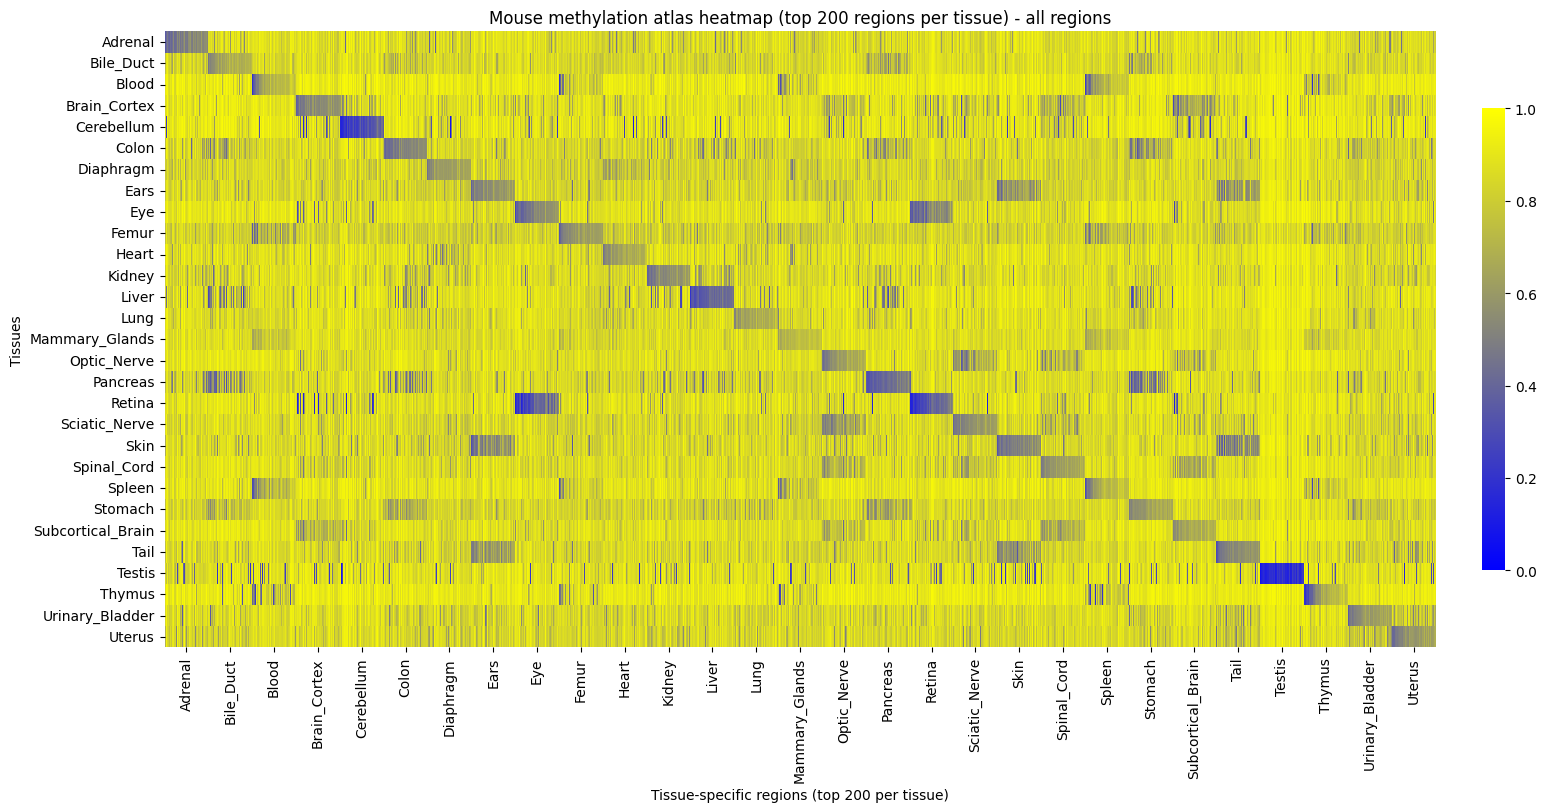

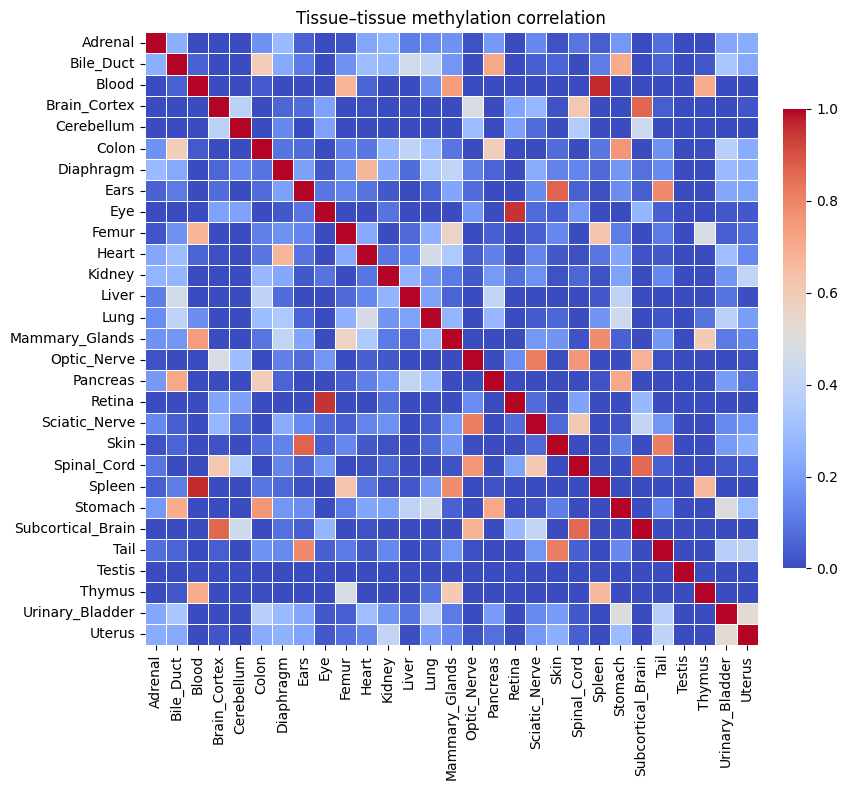

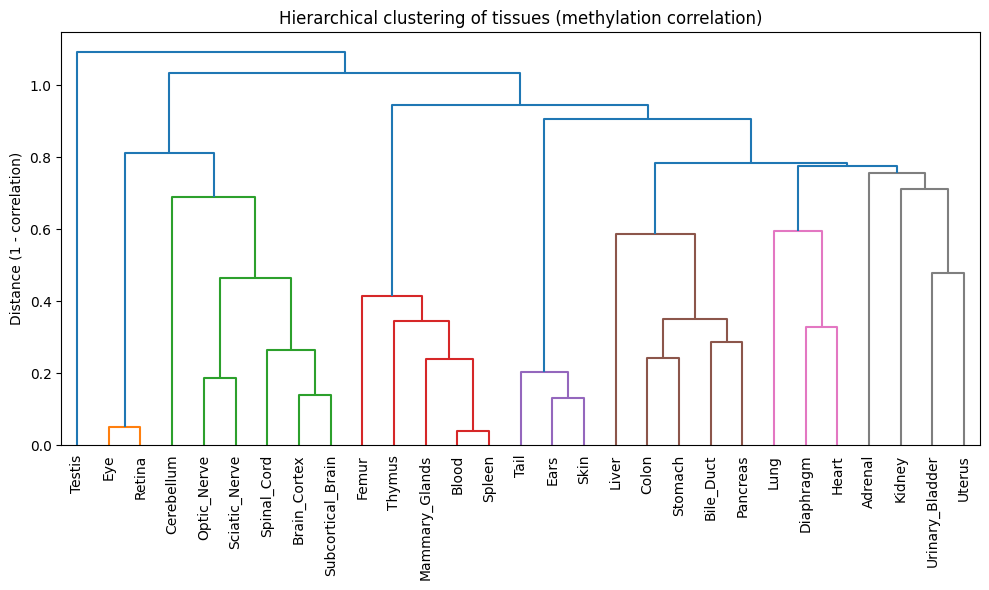

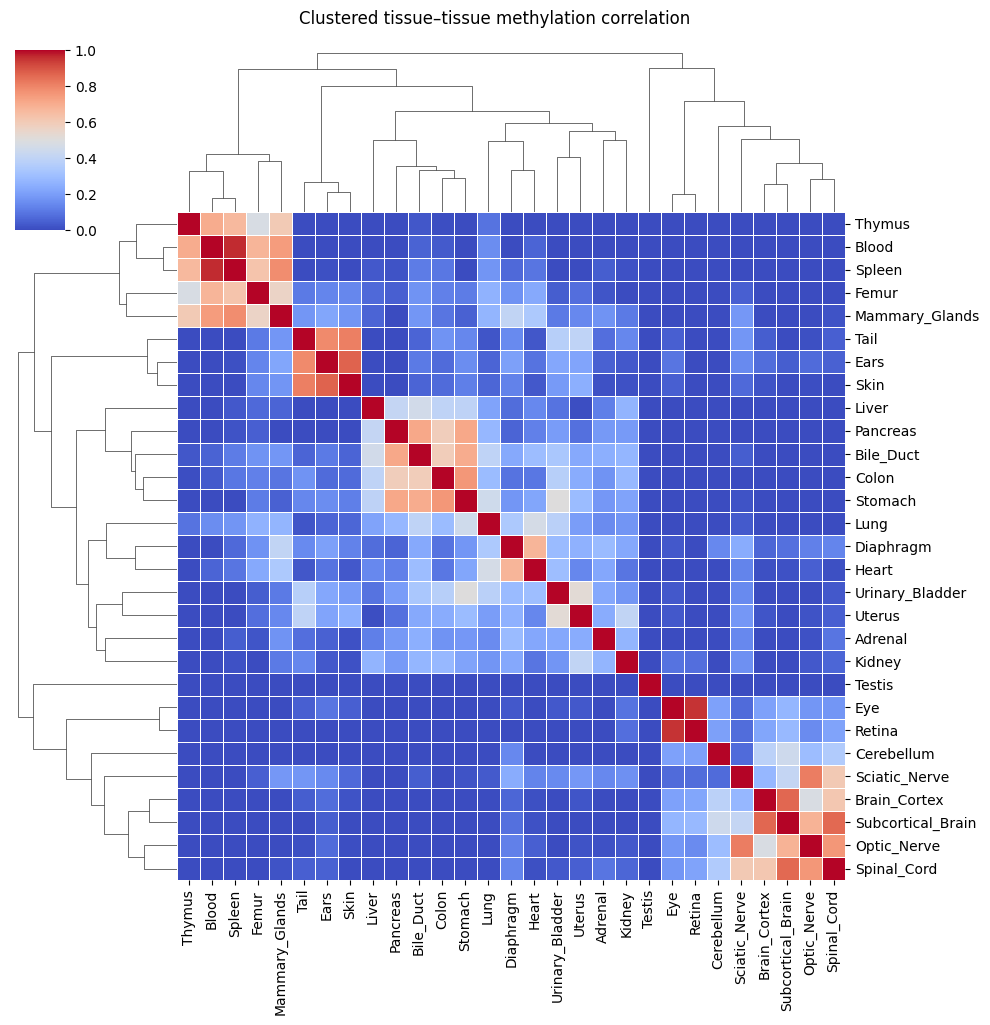

In [66]:
""" FULL PIPELINE - 29 TISSUES """

# Step 1: compute per-tissue differential tables
all_tissues_results = build_tissue_diff_table(
    df=DATAFRAME,
    use_filtering=USE_FILTERING
)

# Step 2: extract top N regions per tissue
df_top_regions = extract_top_regions(
    all_tissues_results,
    top_n=TOP_N
)

# Step 3: create heatmap matrix (tissues × regions)
heatmap_matrix, regions_per_tissue_count = create_heatmap_matrix(
    df=DATAFRAME,
    df_top_regions=df_top_regions,
    region_mode=REGION_MODE,
    verbose=USE_VERBOSE
)

# Step 4: plot methylation heatmap
plot_heatmap(
    heatmap_matrix,
    regions_per_tissue_count,
    top_n=TOP_N,
    title=f"{HEATMAP_TITLE} (top {TOP_N} regions per tissue) - {REGION_MODE} regions"
)

# Step 5: compute tissue–tissue correlation matrix
tissue_corr = compute_tissue_correlation(
    heatmap_matrix,
    method=CORR_METHOD
)

# Step 6: plot tissue correlation heatmap
plot_tissue_correlation(
    tissue_corr,
    title=CORR_TITLE
)

# Step 7: plot tissue dendrogram (hierarchical clustering)
Z = plot_tissue_dendrogram(
    tissue_corr,
    method=CLUSTER_METHOD,
    title=DENDRO_TITLE
)

# Step 8: plot clustered tissue correlation heatmap
plot_clustered_tissue_correlation(
    tissue_corr,
    title=CLUSTERED_CORR_TITLE
)


In [73]:
""" PIPELINE CONFIG UNIQUE"""

# input dataframe
DATAFRAME = df_merged            # tissue-averaged beta matrix (probe_ID + tissues)

# use filtering + diff ranking (True) VS. Only diff ranking (False)
USE_FILTERING = True               # passed to build_tissue_diff_table
USE_VERBOSE = True                 # display the distribution of regions in cell types.

# region selection
TOP_N = 200                        # number of top regions per tissue
REGION_MODE = "unique"                # "all" or "unique"

# correlation / clustering
CORR_METHOD = "pearson"            # "pearson" or "spearman"
CLUSTER_METHOD = "average"         # linkage method

# plotting
HEATMAP_TITLE = "Mouse methylation atlas heatmap"
CORR_TITLE = "Tissue–tissue methylation correlation"
DENDRO_TITLE = "Hierarchical clustering of tissues (methylation correlation)"
CLUSTERED_CORR_TITLE = "Clustered tissue–tissue methylation correlation"

Top regions shape: (4200, 5)
Region mode: unique
Total regions used: 2388


,n_regions
tissue,
Eye_Retina,151
Brain_Cortex_Subcortical,95
Blood_Spleen_Thymus,51
Skin_Ears_Tail,133
Adrenal,154
Bile_Duct,87
Cerebellum,139
Colon,114
Diaphragm,127


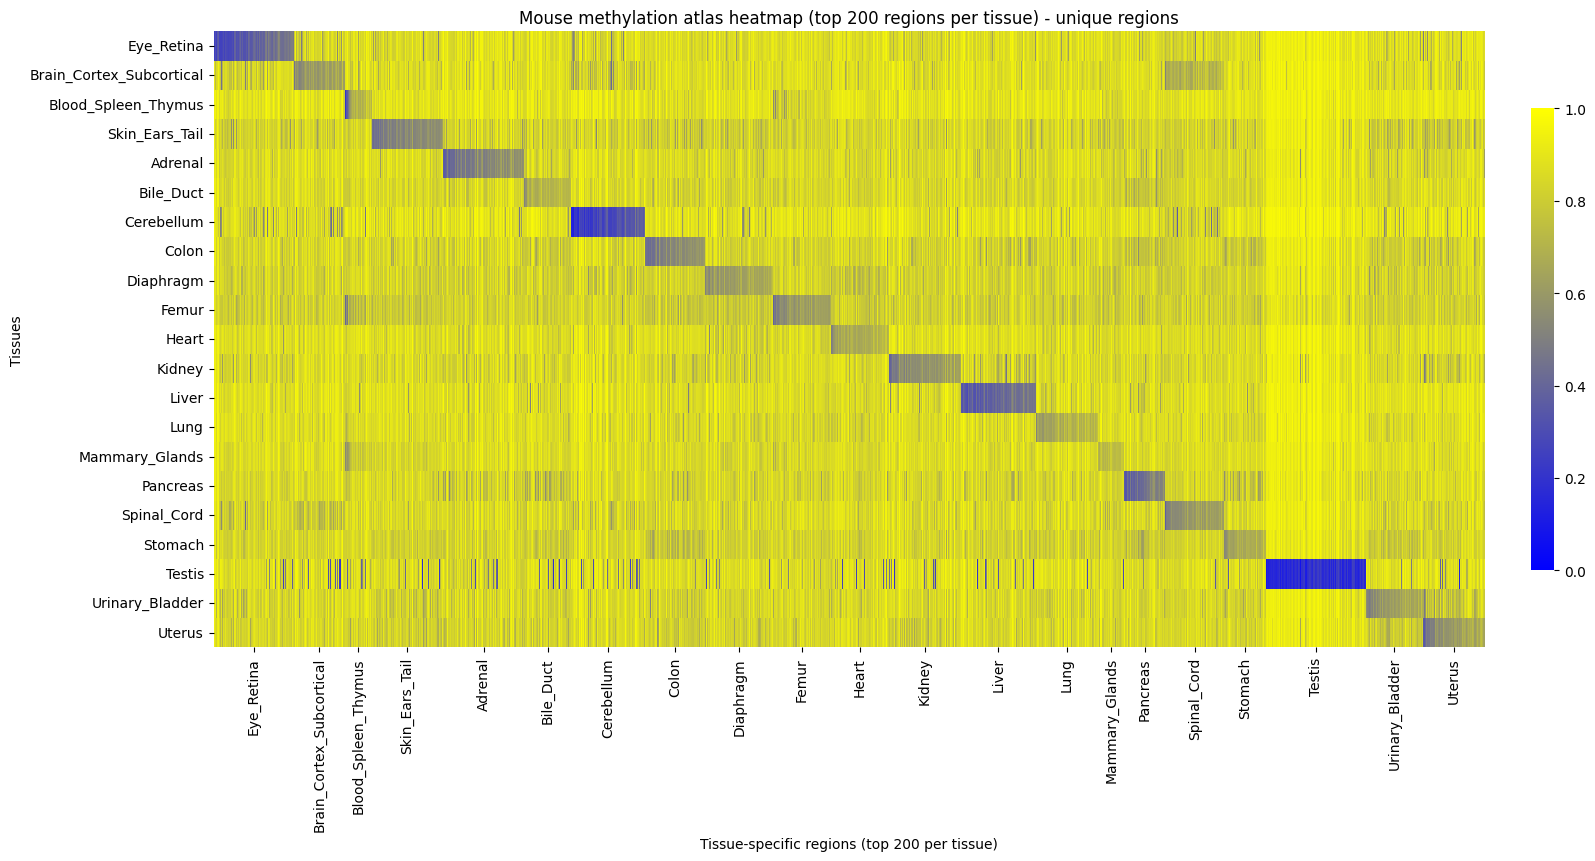

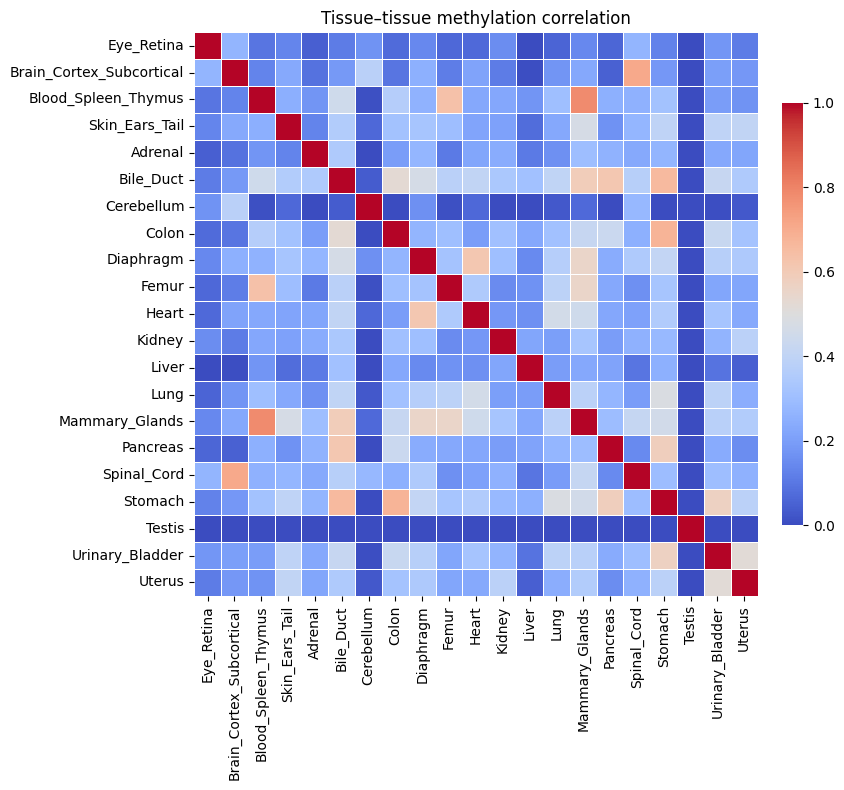

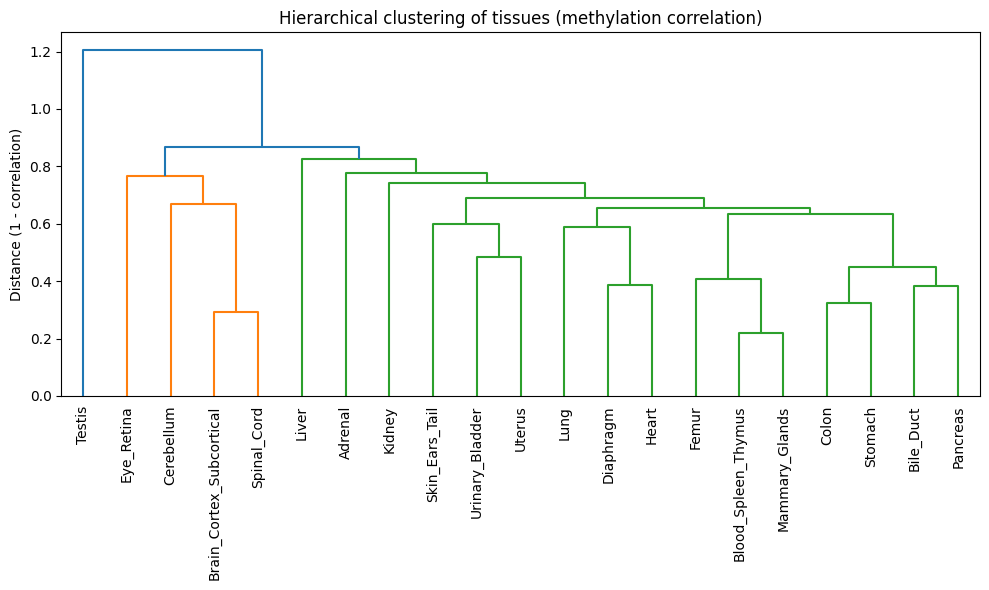

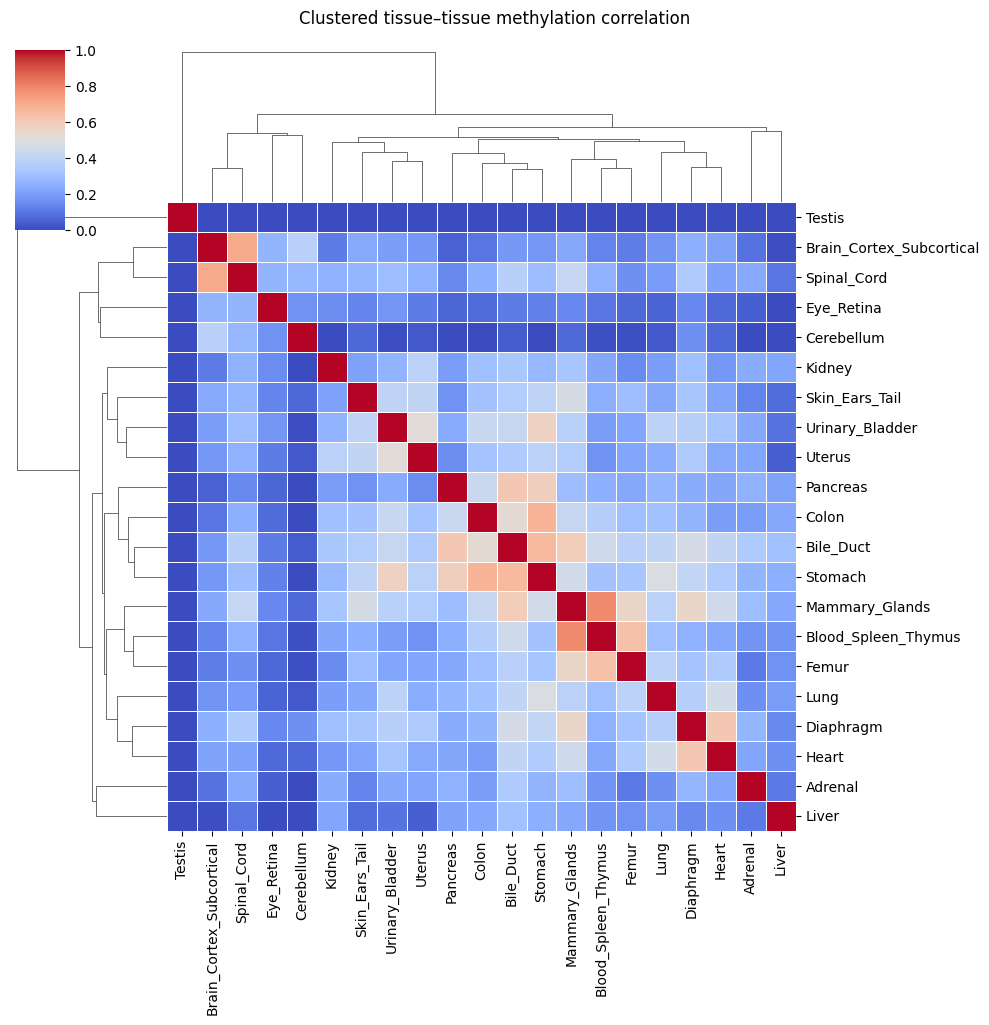

In [74]:
""" FULL PIPELINE - 21 TISSUES """

# Step 1: compute per-tissue differential tables
all_tissues_results = build_tissue_diff_table(
    df=DATAFRAME,
    use_filtering=USE_FILTERING
)

# Step 2: extract top N regions per tissue
df_top_regions = extract_top_regions(
    all_tissues_results,
    top_n=TOP_N
)

# Step 3: create heatmap matrix (tissues × regions)
heatmap_matrix, regions_per_tissue_count = create_heatmap_matrix(
    df=DATAFRAME,
    df_top_regions=df_top_regions,
    region_mode=REGION_MODE,
    verbose=USE_VERBOSE
)

# Step 4: plot methylation heatmap
plot_heatmap(
    heatmap_matrix,
    regions_per_tissue_count,
    top_n=TOP_N,
    title=f"{HEATMAP_TITLE} (top {TOP_N} regions per tissue) - {REGION_MODE} regions"
)

# Step 5: compute tissue–tissue correlation matrix
tissue_corr = compute_tissue_correlation(
    heatmap_matrix,
    method=CORR_METHOD
)

# Step 6: plot tissue correlation heatmap
plot_tissue_correlation(
    tissue_corr,
    title=CORR_TITLE
)

# Step 7: plot tissue dendrogram (hierarchical clustering)
Z = plot_tissue_dendrogram(
    tissue_corr,
    method=CLUSTER_METHOD,
    title=DENDRO_TITLE
)

# Step 8: plot clustered tissue correlation heatmap
plot_clustered_tissue_correlation(
    tissue_corr,
    title=CLUSTERED_CORR_TITLE
)
